# I. Importations des modules et des données
## 1.1 Importation des modules

In [13]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from zipfile import ZipFile
import shutil
import glob

## 1.2 Extraction des données

In [14]:
# allow_extraction = False
# datasets_path = r"C:\Users\axelb\Desktop\Projet DS\Datasets"
# extracted_datasets_path = os.path.join(datasets_path,'Extracted')
# new_dataset_filename = "Other"
# new_dataset_path = os.path.join(extracted_datasets_path, new_dataset_filename)
# datasets_to_regroup = ['Dataset','Painting','Schematics','Sketch','Text']

# if allow_extraction:
#     try:
#         for dataset_filename in os.listdir(datasets_path):

#             dataset_path = os.path.join(datasets_path, dataset_filename)
#             dataset_zip = ZipFile(dataset_path, 'r')

#             if not os.path.exists(extracted_datasets_path):
#                 os.makedirs(extracted_datasets_path)
#                 print(f"Extraction folder successfully created at '{extracted_datasets_path}'")

#             print(f"Starting the extraction of '{dataset_filename}' at '{extracted_datasets_path}'")
#             dataset_zip.extractall(extracted_datasets_path)
#             print(f"'{dataset_filename}' was successfully extracted at '{extracted_datasets_path}'")

#         dataset_zip.close()
#     except:
#         pass
    
#     if not os.path.exists(new_dataset_path):
#         os.makedirs(new_dataset_path)
#         print(f"New folder successfully created at '{new_dataset_path}'")
#     for dataset in os.listdir(extracted_datasets_path):
#         if dataset in datasets_to_regroup:
#             dataset_directory = os.path.join(extracted_datasets_path, dataset)
#             print(f"Starting the copy of '{dataset_directory}' at '{new_dataset_path}'")
#             shutil.copytree(dataset_directory, new_dataset_path, copy_function=shutil.move, dirs_exist_ok=True)
#             print(f"'The content of {dataset_directory}' was successfully extracted at '{new_dataset_path}'")
#             shutil.rmtree(dataset_directory)

## 1.3 Pré-traitement des données

### Recherche d'images  corrompues et rotation des images

In [15]:
project_path = r"..\Datasets_test_binary\OneDrive_2022-09-22\Dataset projet"
other_dir = project_path + r"\other"
photo_dir = project_path + r"\photo"

In [16]:
allow_search_for_corrupted = False
bad_paths = []

if allow_search_for_corrupted:
    img_paths = glob.glob(os.path.join(project_path,'*/*.*')) # assuming you point to the directory containing the label folders.

    
    for image_path in img_paths:
        try:
          img_bytes = tf.io.read_file(image_path)
          decoded_img = tf.io.decode_image(img_bytes)
        except tf.errors.InvalidArgumentError as e:
          print(f"Found bad path {image_path}...{e}")
          bad_paths.append(image_path)

    print("BAD PATHS:")
    for bad_path in bad_paths:
        print(f"{bad_path}")

In [17]:
for path in bad_paths:
    try:
        os.remove(path)
    except OSError as error:
        break

## 1.4 Importation des données

In [18]:
train_set, test_set = tf.keras.preprocessing.image_dataset_from_directory(
    project_path,
    validation_split=0.2,
    seed=10,
    image_size = (256, 384),
    batch_size=128,
    subset = "both"
)
print(f"\nThe dataset is composed of these classes : {train_set.class_names}")


Found 41405 files belonging to 2 classes.
Using 33124 files for training.
Using 8281 files for validation.

The dataset is composed of these classes : ['Other', 'Photo']


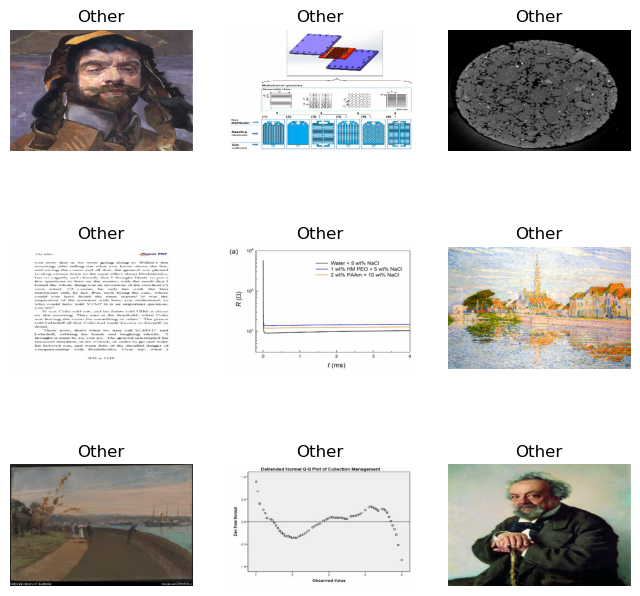

In [19]:
plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_set.class_names[labels[i]])
        plt.axis("off")
plt.show()

## 1.5 Augmentation des données

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomTranslation((0.2, 0.5),(0.2, 0.5)),
  tf.keras.layers.RandomZoom((0.2, 0.5)),
  tf.keras.layers.RandomContrast((0.2,0.5))
])

augmented_train_set = train_set.map(lambda x, y: (data_augmentation(x, training=True), y))
print(augmented_train_set.cardinality())

# 2. Modélisation des données
## 2.1 Définition du modèle

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## 2.2 Compilation du modèle 

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

## 2.3 Entrainement du modèle

Epoch 1/10
259/259 [==============================] - 360s 1s/step - loss: 0.4508 - accuracy: 0.7974 - val_loss: 0.3865 - val_accuracy: 0.7879
Epoch 2/10
259/259 [==============================] - 384s 1s/step - loss: 0.3204 - accuracy: 0.8386 - val_loss: 0.3468 - val_accuracy: 0.8127
Epoch 3/10
259/259 [==============================] - 387s 1s/step - loss: 0.2987 - accuracy: 0.8553 - val_loss: 0.3784 - val_accuracy: 0.8058
Epoch 4/10
259/259 [==============================] - 385s 1s/step - loss: 0.2788 - accuracy: 0.8671 - val_loss: 0.3467 - val_accuracy: 0.8256
Epoch 5/10
259/259 [==============================] - 385s 1s/step - loss: 0.2627 - accuracy: 0.8788 - val_loss: 0.3149 - val_accuracy: 0.8441
Epoch 6/10
259/259 [==============================] - 374s 1s/step - loss: 0.2458 - accuracy: 0.8887 - val_loss: 0.3161 - val_accuracy: 0.8513
Epoch 7/10
259/259 [==============================] - 469s 2s/step - loss: 0.2375 - accuracy: 0.8933 - val_loss: 0.3123 - val_accuracy: 0.8517

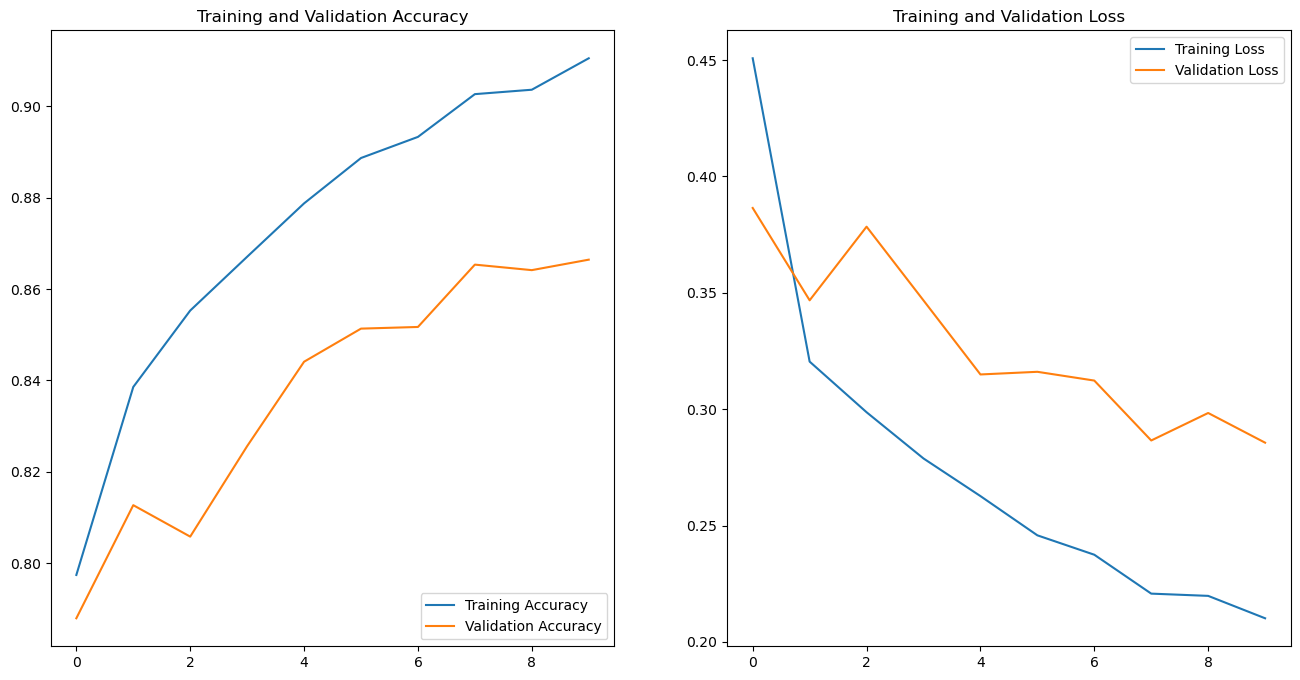

In [23]:
epochs = 10


history =  model.fit(
    augmented_train_set,
    validation_data=test_set,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)